In [1]:
### --- importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import export_graphviz



In [2]:
### --- Importing the file
CD = pd.read_csv('Credit_data.csv')
CD

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
0,1,20000,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,90000,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,3,50000,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,4,50000,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,5,50000,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23996,80000,1,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
23996,23997,150000,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
23997,23998,30000,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
23998,23999,80000,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
### --- Droppping columns
CD = CD.drop(["ID"], axis=1)


## Creating the labels y and x in order to do our prodiction and seperating the data into training/validation/testing with percentages 60/20/20

In [4]:
y = CD[["default_0"]]
X = CD.drop(columns=["default_0"])

In [5]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 657)

In [6]:
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 343)

## Using scikit we run a logistic regression on X_train, y_train with the parameter max_iter set to 2000

In [7]:
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000)

We are doing the ROC curve , in order to use the area under the curve here given by `metrics.roc_auc_score` to evaluate the quality of our model.

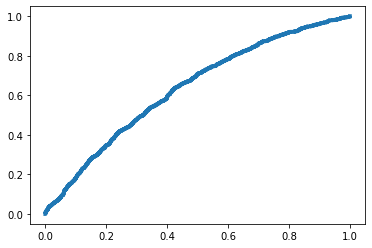

In [8]:
from matplotlib import pyplot
y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [9]:
metrics.roc_auc_score(y_validation, y_pred_prob)

0.6347302427428545

# Engineering 'features' in order to create a better model

In [10]:
### --- Dummy for sex 
#### --- 1 stands for female and 0 for male
CD = pd.get_dummies(CD, columns = ['SEX'])
CD = CD.drop(["SEX_1"], axis = 1)
CD = CD.rename({'SEX_2': 'SEX_FEMALE'}, axis=1)

In [11]:
### --- Dummy for marriage
CD = pd.get_dummies(CD, columns = ['MARRIAGE'])
CD['MARRIAGE_0_3'] = (CD.MARRIAGE_0 | CD.MARRIAGE_3).astype(int)
CD = CD.drop(["MARRIAGE_0", "MARRIAGE_3"], axis = 1)
CD = CD.rename({'MARRIAGE_1': 'MARRIED'}, axis=1)
CD = CD.rename({'MARRIAGE_2': 'SINGLE'}, axis=1)

In [12]:
### --- Dummy for education
CD = pd.get_dummies(CD, columns = ['EDUCATION'])
CD = CD.drop(["EDUCATION_0", "EDUCATION_5", "EDUCATION_6"], axis = 1)
CD = CD.rename({"EDUCATION_1": 'GRADUATE'}, axis=1)
CD = CD.rename({"EDUCATION_2": 'UNDERGRADUATE'}, axis=1)
CD = CD.rename({"EDUCATION_3": 'HIGHSCHOOL'}, axis=1)
CD = CD.rename({"EDUCATION_4": 'OTHER'}, axis=1)

In [13]:
### --- Dummy for pay
CD["PAY_1"] = CD["PAY_1"].replace(-2,0).replace(-1,0)
CD["PAY_1"] = CD["PAY_1"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)

CD["PAY_2"] = CD["PAY_2"].replace(-2,0).replace(-1,0)
CD["PAY_2"] = CD["PAY_2"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)

CD["PAY_3"] = CD["PAY_3"].replace(-2,0).replace(-1,0)
CD["PAY_3"] = CD["PAY_3"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)


CD["PAY_4"] = CD["PAY_4"].replace(-2,0).replace(-1,0)
CD["PAY_4"] = CD["PAY_4"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)


CD["PAY_5"] = CD["PAY_5"].replace(-2,0).replace(-1,0)
CD["PAY_5"] = CD["PAY_5"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)


CD["PAY_6"] = CD["PAY_6"].replace(-2,0).replace(-1,0)
CD["PAY_6"] = CD["PAY_6"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)

In [14]:
### --- STANDARDISED SCALING

### --- scaling limit, bill amt and pay amt 
CD[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
    'BILL_AMT6']] = preprocessing.scale(CD[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
    'BILL_AMT6']])

CD[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
    'PAY_AMT6']] = preprocessing.scale(CD[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
    'PAY_AMT6']])

CD[['LIMIT_BAL']] = preprocessing.scale(CD[['LIMIT_BAL']])

In [15]:
CD

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,default_0,SEX_FEMALE,MARRIED,SINGLE,MARRIAGE_0_3,GRADUATE,UNDERGRADUATE,HIGHSCHOOL,OTHER
0,-1.138345,24,1,1,0,0,0,0,-0.640803,-0.646348,...,-0.289940,1,1,1,0,0,0,1,0,0
1,-0.599489,34,0,0,0,0,0,0,-0.296915,-0.492875,...,-0.015424,0,1,0,1,0,0,1,0,0
2,-0.907406,37,0,0,0,0,0,0,-0.055884,-0.012355,...,-0.235037,0,1,1,0,0,0,1,0,0
3,-0.907406,57,0,0,0,0,0,0,-0.576930,-0.610273,...,-0.252661,0,0,1,0,0,0,1,0,0
4,-0.907406,37,0,0,0,0,0,0,0.180517,0.111772,...,-0.246018,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-0.676468,34,1,1,1,1,1,1,0.291277,0.401706,...,-0.070327,1,0,0,1,0,0,1,0,0
23996,-0.137612,43,0,0,0,0,0,0,-0.671083,-0.664245,...,-0.289940,0,0,0,1,0,0,0,1,0
23997,-1.061365,37,1,1,1,0,0,0,-0.645529,-0.642780,...,-0.119740,1,0,0,1,0,0,1,0,0
23998,-0.676468,41,1,0,0,0,0,0,-0.716272,0.411132,...,-0.190895,1,0,1,0,0,0,0,1,0


In [16]:
np.mean(CD.default_0) ### --- percentage of the people that can not pay 

0.22108333333333333

In [17]:
y = CD[["default_0"]]

In [18]:
X = CD.drop(columns=["default_0"])

In [19]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 657)

In [20]:
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 343)

In [21]:
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000)

# Getting the coefficients

In [22]:
summary = pd.DataFrame([X_train.columns,classifier_LR.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary


,Variable,Coefficient
2,PAY_1,1.285453
24,GRADUATE,0.870091
25,UNDERGRADUATE,0.855394
26,HIGHSCHOOL,0.784886
5,PAY_4,0.40101
4,PAY_3,0.344431
7,PAY_6,0.34178
6,PAY_5,0.324394
10,BILL_AMT3,0.157683
3,PAY_2,0.155387


## Doing the ROC curve again, in order to evaluate the quality of our new model.

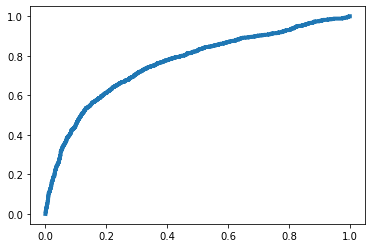

In [23]:
from matplotlib import pyplot
y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [24]:
metrics.roc_auc_score(y_validation, y_pred_prob)

0.7631624553354933

In [25]:
### --- Setting a random Threshold

threshold = 0.5
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)

In [26]:
metrics.accuracy_score(y_validation,y_validation_pred)

0.8052083333333333

## Doing a for loop in order to find the best threshold for the model.
The threshold that gives the biggest profit

In [27]:
thres = []
Profits=[]
threshold=np.arange(0,1,0.01)
for i in threshold:
    y_validation_pred = np.where(y_pred_prob < i, 0, 1)
    cm = metrics.confusion_matrix(y_validation, y_validation_pred)
    profit1 = cm[0][0] * 1500 + cm[1][0] * (-5000) + cm[0][1] * 0 + cm[1][1] * 0
    print("The profit at threshold " + str(i) + " is " + str(profit1))
    Profits.append(profit1)
    thres.append(i)



thresprof = pd.DataFrame(
        {'Profits2': Profits,
         'Threshold': thres})
thresprof

The profit at threshold 0.0 is 0
The profit at threshold 0.01 is 10500
The profit at threshold 0.02 is 17500
The profit at threshold 0.03 is 30500
The profit at threshold 0.04 is 64000
The profit at threshold 0.05 is 86500
The profit at threshold 0.06 is 167500
The profit at threshold 0.07 is 254500
The profit at threshold 0.08 is 360500
The profit at threshold 0.09 is 489500
The profit at threshold 0.1 is 582500
The profit at threshold 0.11 is 746500
The profit at threshold 0.12 is 1054000
The profit at threshold 0.13 is 1422000
The profit at threshold 0.14 is 1745500
The profit at threshold 0.15 is 2009000
The profit at threshold 0.16 is 2227500
The profit at threshold 0.17 is 2307000
The profit at threshold 0.18 is 2358500
The profit at threshold 0.19 is 2368500
The profit at threshold 0.2 is 2349000
The profit at threshold 0.21 is 2341500
The profit at threshold 0.22 is 2326500
The profit at threshold 0.23 is 2341500
The profit at threshold 0.24 is 2338500
The profit at threshold 0

,Profits2,Threshold
0,0,0.00
1,10500,0.01
2,17500,0.02
3,30500,0.03
4,64000,0.04
...,...,...
95,141000,0.95
96,141000,0.96
97,141000,0.97
98,141000,0.98


In [28]:
### --- Finding the row where the profit is max
thresprof.idxmax(axis=0, skipna=True)


Profits2     19
Threshold    99
dtype: int64

In [29]:
### --- Printing the row in order to find the threshold on the biggest profit.
print(thresprof.loc[[19]])

    Profits2  Threshold
19   2368500       0.19


1. True negative: The net-profit then is £1500
2. False negative: The net-profit for such a group is £-5000
3. False positive: The net-profit here is £0
4. True positive: The net-profit here is £0

In [30]:
threshold = 0.19
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)
metrics.confusion_matrix(y_validation, y_validation_pred)

array([[2899,  815],
       [ 396,  690]])

## Importing the 1000 applicants 

In [31]:
df = pd.read_csv('New_applicantions.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Unnamed: 24
0,n1000-1,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000.0,40000.0,38000.0,20239,13750.0,13770,NaN
1,n1000-2,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0.0,0.0,0.0,0,0.0,0,NaN
2,n1000-3,150000,1,1,2,27,0,0,0,0,...,89775,87725,40788,4031.0,10006.0,3266.0,4040,1698.0,800,NaN
3,n1000-4,20000,1,2,1,38,0,0,0,0,...,18240,17928,150,1699.0,1460.0,626.0,1750,150.0,0,NaN
4,n1000-5,400000,1,2,1,34,-1,-1,-1,-1,...,7839,14837,7959,9677.0,11867.0,7839.0,14837,7959.0,5712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,n1000-996,200000,1,1,1,37,-2,-2,-2,-2,...,20632,3142,21253,55291.0,25120.0,25118.0,36,27107.0,43215,NaN
996,n1000-997,50000,1,2,2,40,2,0,0,2,...,13444,13367,13282,2000.0,2000.0,1000.0,1000,1000.0,2000,NaN
997,n1000-998,290000,1,2,2,30,2,2,0,0,...,202680,133478,131024,0.0,9000.0,10500.0,17000,0.0,3500,NaN
998,n1000-999,280000,1,1,1,31,0,0,0,0,...,149816,128721,130406,8900.0,8100.0,7200.0,5000,5000.0,4700,NaN


In [32]:
### --- Deleting the last column 
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,n1000-1,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000.0,40000.0,38000.0,20239,13750.0,13770
1,n1000-2,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0.0,0.0,0.0,0,0.0,0
2,n1000-3,150000,1,1,2,27,0,0,0,0,...,89006,89775,87725,40788,4031.0,10006.0,3266.0,4040,1698.0,800
3,n1000-4,20000,1,2,1,38,0,0,0,0,...,19559,18240,17928,150,1699.0,1460.0,626.0,1750,150.0,0
4,n1000-5,400000,1,2,1,34,-1,-1,-1,-1,...,11867,7839,14837,7959,9677.0,11867.0,7839.0,14837,7959.0,5712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,n1000-996,200000,1,1,1,37,-2,-2,-2,-2,...,19583,20632,3142,21253,55291.0,25120.0,25118.0,36,27107.0,43215
996,n1000-997,50000,1,2,2,40,2,0,0,2,...,13876,13444,13367,13282,2000.0,2000.0,1000.0,1000,1000.0,2000
997,n1000-998,290000,1,2,2,30,2,2,0,0,...,197238,202680,133478,131024,0.0,9000.0,10500.0,17000,0.0,3500
998,n1000-999,280000,1,1,1,31,0,0,0,0,...,168463,149816,128721,130406,8900.0,8100.0,7200.0,5000,5000.0,4700


# Starting the engineering

In [33]:
### --- Dummy for sex 
# 1 stands for female and 0 for male
df = pd.get_dummies(df, columns = ['SEX'])
df = df.drop(["SEX_1"], axis = 1)
df = df.rename({'SEX_2': 'SEX_FEMALE'}, axis=1)

In [34]:
### --- Dummy for marriage
df = pd.get_dummies(df, columns = ['MARRIAGE'])
df['MARRIAGE_0_3'] = (df.MARRIAGE_0 | df.MARRIAGE_3).astype(int)
df = df.drop(["MARRIAGE_0", "MARRIAGE_3"], axis = 1)
df = df.rename({'MARRIAGE_1': 'MARRIED'}, axis=1)
df = df.rename({'MARRIAGE_2': 'SINGLE'}, axis=1)

In [35]:
### --- Dummy for education
df = pd.get_dummies(df, columns = ['EDUCATION'])
df = df.drop(["EDUCATION_0", "EDUCATION_5", "EDUCATION_6"], axis = 1)
df = df.rename({"EDUCATION_1": 'GRADUATE'}, axis=1)
df = df.rename({"EDUCATION_2": 'UNDERGRADUATE'}, axis=1)
df = df.rename({"EDUCATION_3": 'HIGHSCHOOL'}, axis=1)
df = df.rename({"EDUCATION_4": 'OTHER'}, axis=1)

In [36]:
### --- Dummy for pay
df["PAY_1"] = df["PAY_1"].replace(-2,0).replace(-1,0)
df["PAY_1"] = df["PAY_1"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)

df["PAY_2"] = df["PAY_2"].replace(-2,0).replace(-1,0)
df["PAY_2"] = df["PAY_2"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)

df["PAY_3"] = df["PAY_3"].replace(-2,0).replace(-1,0)
df["PAY_3"] = df["PAY_3"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)


df["PAY_4"] = df["PAY_4"].replace(-2,0).replace(-1,0)
df["PAY_4"] = df["PAY_4"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)


df["PAY_5"] = df["PAY_5"].replace(-2,0).replace(-1,0)
df["PAY_5"] = df["PAY_5"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)


df["PAY_6"] = df["PAY_6"].replace(-2,0).replace(-1,0)
df["PAY_6"] = df["PAY_6"].replace(2,1).replace(3,1).replace(4,1).replace(5,1).replace(6,1).replace(7,1).replace(8,1).replace(9,1)

In [37]:
### --- STANDARDISED SCALING

### --- Scaling limit, bill amt and pay amt 
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
    'BILL_AMT6']] = preprocessing.scale(df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
    'BILL_AMT6']])

df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
    'PAY_AMT6']] = preprocessing.scale(df[[
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
    'PAY_AMT6']])

df[['LIMIT_BAL']] = preprocessing.scale(df[['LIMIT_BAL']])

In [38]:
df

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,SEX_FEMALE,MARRIED,SINGLE,MARRIAGE_0_3,GRADUATE,UNDERGRADUATE,HIGHSCHOOL,OTHER
0,n1000-1,2.632642,29,0,0,0,0,0,0,4.532902,...,0.443790,0.734057,0,0,1,0,1,0,0,0
1,n1000-2,0.362718,29,0,0,0,0,0,0,-0.716121,...,-0.285717,-0.341001,0,0,1,0,1,0,0,0
2,n1000-3,-0.106921,27,0,0,0,0,0,0,0.510798,...,-0.195630,-0.278543,0,0,1,0,1,0,0,0
3,n1000-4,-1.124473,38,0,0,0,0,0,0,-0.459736,...,-0.277759,-0.341001,0,1,0,0,0,1,0,0
4,n1000-5,1.849910,34,0,0,0,0,0,0,-0.435671,...,0.136548,0.104949,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,n1000-996,0.284445,37,0,0,0,0,0,0,-0.551046,...,1.152446,3.032901,0,1,0,0,1,0,0,0
996,n1000-997,-0.889654,40,1,0,0,1,0,0,-0.558379,...,-0.232662,-0.184856,0,0,1,0,0,1,0,0
997,n1000-998,0.988904,30,1,1,0,0,0,1,3.137299,...,-0.285717,-0.067747,0,0,1,0,0,1,0,0
998,n1000-999,0.910631,31,0,0,0,0,0,0,2.642732,...,-0.020442,0.025940,0,1,0,0,1,0,0,0


In [39]:
df1 = df.drop(['ID'], axis=1)
df1


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_FEMALE,MARRIED,SINGLE,MARRIAGE_0_3,GRADUATE,UNDERGRADUATE,HIGHSCHOOL,OTHER
0,2.632642,29,0,0,0,0,0,0,4.532902,5.458975,...,0.443790,0.734057,0,0,1,0,1,0,0,0
1,0.362718,29,0,0,0,0,0,0,-0.716121,-0.717552,...,-0.285717,-0.341001,0,0,1,0,1,0,0,0
2,-0.106921,27,0,0,0,0,0,0,0.510798,0.573270,...,-0.195630,-0.278543,0,0,1,0,1,0,0,0
3,-1.124473,38,0,0,0,0,0,0,-0.459736,-0.427226,...,-0.277759,-0.341001,0,1,0,0,0,1,0,0
4,1.849910,34,0,0,0,0,0,0,-0.435671,-0.572652,...,0.136548,0.104949,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.284445,37,0,0,0,0,0,0,-0.551046,0.073944,...,1.152446,3.032901,0,1,0,0,1,0,0,0
996,-0.889654,40,1,0,0,1,0,0,-0.558379,-0.530483,...,-0.232662,-0.184856,0,0,1,0,0,1,0,0
997,0.988904,30,1,1,0,0,0,1,3.137299,2.482730,...,-0.285717,-0.067747,0,0,1,0,0,1,0,0
998,0.910631,31,0,0,0,0,0,0,2.642732,2.234033,...,-0.020442,0.025940,0,1,0,0,1,0,0,0


In [40]:
X2 = df1
y_pred_prob = classifier_LR.predict_proba(X2)[:,1]
y_pred_prob

array([3.37989505e-02, 1.38260484e-01, 1.28407634e-01, 1.97392192e-01,
       8.71269811e-02, 3.73243840e-01, 2.46282698e-01, 1.33513483e-01,
       5.38265279e-01, 1.60717537e-01, 8.17083916e-02, 1.17866666e-01,
       1.05563321e-01, 1.19551181e-01, 2.71495400e-01, 1.49485930e-01,
       1.63978321e-01, 1.56920012e-01, 6.45310666e-01, 2.86748459e-01,
       1.55233923e-01, 3.81281120e-01, 1.56975660e-01, 4.54472859e-01,
       1.42272610e-01, 1.19590921e-01, 1.63597841e-01, 1.04879353e-01,
       1.85527561e-01, 1.69311584e-01, 1.41972469e-01, 7.24287034e-01,
       4.00316298e-01, 2.04997842e-01, 4.17822545e-01, 3.18207245e-01,
       1.43517866e-01, 3.40342932e-01, 1.72296539e-01, 4.30909061e-01,
       7.17480883e-01, 4.30770684e-01, 1.34083874e-01, 1.95565378e-01,
       1.18045535e-01, 1.49715554e-01, 1.63045114e-01, 1.13462942e-01,
       1.53214746e-01, 6.65739111e-04, 1.39514139e-01, 1.75256859e-01,
       1.74552478e-01, 1.19706089e-01, 1.48125608e-01, 1.33264166e-01,
      

In [41]:
y_validation_pred = np.where(y_pred_prob < 0.19, 1, 0)

In [42]:
### --- 1 = issued credit, 0 = not issued credit
print(*y_validation_pred, sep=" ")

1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 

In [43]:
final = pd.DataFrame({'ID': df['ID'], 'Issued_Credit': y_validation_pred, 'Probability' : y_pred_prob})

In [44]:
### --- the probability is the 
final 

,ID,Issued_Credit,Probability
0,n1000-1,1,0.033799
1,n1000-2,1,0.138260
2,n1000-3,1,0.128408
3,n1000-4,0,0.197392
4,n1000-5,1,0.087127
...,...,...,...
995,n1000-996,1,0.064517
996,n1000-997,0,0.515525
997,n1000-998,0,0.441530
998,n1000-999,1,0.143545


# Sorting the IDs, the Issued Credit and the Probabilities only by 1, those who are issued the credit.

# Smaller Probability means smaller probability of the person to default. 

In [45]:
### --- the first three are the most likely to repay
### --- the last three are the most likaely to not repay
final = final[final['Issued_Credit']==1].sort_values('Probability', ascending=True)
final

,ID,Issued_Credit,Probability
49,n1000-50,1,0.000666
673,n1000-674,1,0.001201
968,n1000-969,1,0.002027
444,n1000-445,1,0.007282
796,n1000-797,1,0.008771
...,...,...,...
374,n1000-375,1,0.188868
894,n1000-895,1,0.189072
475,n1000-476,1,0.189100
823,n1000-824,1,0.189467
